# Section 3 - The ArcGIS Python API
_Complete the following Python tasks. Comments aren't required but they can be helpful in awarding partial credit if you fail to get the correct answer._

### <mark>This notebook should be run with the ArcGISPro Jupyter environment </mark>

* **Task 1**: Connection to ArcGIS Online
* **Task 2**: Search for data
* **Task 3**: Extract a layer from a returned layer service object & map it
* **Task 4**: Query records and download to your local machine

## Task 1: Connect to ArcGIS Online via the `GIS` object

*  Connect to ArcGIS Online as an anonymous user
 * Resource: https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/

In [2]:
#Import the GIS object and connect anonymously
from arcgis import GIS
gis = GIS('home')

---
## Task 2: Search for datasets and extract a specific item 
* Using the "gis" object created above search for **feature layer items** that are **owned** by "MPA_noaa" using the keyword "Marine Protected Areas". Ensure that **up to 100 records** might be located. 
* Display the list of items returned  
Resources: 
* https://developers.arcgis.com/python/guide/accessing-and-creating-content/
* https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.search

In [8]:
#Search for feature layer items *owned by "MPA_noaa" using the keyword "Marine Protected Areas"
items = gis.content.search(query='Marine Protected Areas owner:MPA_noaa',
                           item_type='Feature Layer',
                           outside_org=True)

In [9]:
#Display the list of items found
items

[<Item title:"NOAA's International Program - Where We Work (Feature Service)" type:Feature Layer Collection owner:MPA_noaa>,
 <Item title:"National Marine Sanctuaries" type:Feature Layer Collection owner:MPA_noaa>,
 <Item title:"NOAA's National Marine Sanctuary Sister Sites (Feature Service)" type:Feature Layer Collection owner:MPA_noaa>,
 <Item title:"NOAA's Marine Protected Areas Inventory " type:Feature Layer Collection owner:MPA_noaa>]

---
## Task 3: Extract a layer from the feature layer item and map it
* From the list of items returned, extract the item titled `National Marine Sancutaries` to a variable named `item`. 
* Print this item's ID number.
* Print the list of layers associated with this item
* Extract the first layer in this feature layer service to a feature layer variable named `theLayer`
* Create a map widget centered on California. 
 * Try to alter the map's basemap to the "Oceans" basemap. ([Clue](https://developers.arcgis.com/python/guide/using-the-map-widget/#Basemaps))

In [12]:
#Extract the identified feature layer item to a variable named "item"
item = items[1]

In [15]:
#Show the item's id
item.id

'97a7474480d44098a09d0e7f61ebb6d2'

In [18]:
#Show the list of layers associated with this item
item.layers

[<FeatureLayer url:"https://services2.arcgis.com/C8EMgrsFcRFL6LrL/arcgis/rest/services/National_Marine_Sanctuaries/FeatureServer/0">]

In [19]:
#Extract the first (only?) layer to a variable named "theLayer"
theLayer = item.layers[0]

In [20]:
#Create map centered on "California", add the layer to the map, & show the map
m = gis.map('California')
m.add_layer(theLayer)
m

MapView(layout=Layout(height='400px', width='100%'))

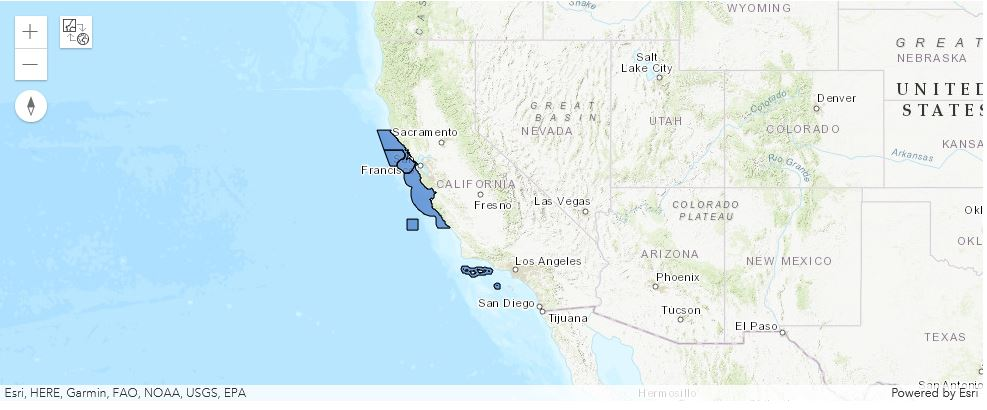

---
## Task 4: Query specific features from a feature layer and download them 
Here we want to query a feature layer of Durham County parcels - for which we are provided a URL - and download the a subset of parcels that meet a certain criteria, in our case *vacant* parcels. 

To do this, we need to:
* access the appropriate feature service - for which we are provided a specific URL
* extract the appropriate feature layer from that feature service
* examine the fields on which we can query the features and the values of those fields
* construct and execute a query
* examine the results
* save the results

### Task 4a: Create the GIS feature service item
The ArcGIS REST endpoint for the Durham Parcel Feature Server hosting the data we want is here:<br>
https://services2.arcgis.com/G5vR3cOjh6g2Ed8E/arcgis/rest/services/Parcels/FeatureServer.   

We can use that page to located the feature server's unique Service Item ID, and then use that ID to pull that feature server into our coding environment:
* Navigate to the URL listed above
* Find the feature server's "Service Item ID" listed on that page
* Access that item via this ID# ([HINT](https://developers.arcgis.com/python/guide/managing-your-content/))

In [22]:
#Retrieve the item associated with the Service Item ID found in the URL
item = gis.content.get('ed698c7ae43c4394b517990b1922aaba')
item.type

'Feature Service'

### Task 4b. Extract the appropriate feature layer from the feature service and explore

* List the layer(s) associated with the feature service item created above. Then extract the first layer as a new variable named `theLayer`

In [23]:
#List the layers associated with the item
item.layers

[<FeatureLayer url:"https://services2.arcgis.com/G5vR3cOjh6g2Ed8E/arcgis/rest/services/Parcels/FeatureServer/0">]

In [28]:
#Extract the first (only?) feature layer in the item to a new variable
layer1 = item.layers[0]
layer1

<FeatureLayer url:"https://services2.arcgis.com/G5vR3cOjh6g2Ed8E/arcgis/rest/services/Parcels/FeatureServer/0">

* List the fields associated with this layer. ([Clue](https://nbviewer.org/github/ENV859/ArcGIS-PythonAPI/blob/master/4-Get-NLCD-Data.ipynb#4.-Exploring-properties-of-the-image-layer)  See Step 4, code cell 2...)

In [37]:
#Iterate through all fields and report each field's name
print([fld.name for fld in layer1.properties.fields])

['OBJECTID', 'PARCEL_ID', 'PIN', 'FRONT_DIM', 'POLY_ACRE', 'SUM_ACRE', 'OLD_ID', 'USERINT', 'CITY_CODE', 'ACCT_', 'OWNAM1', 'OWNAM2', 'OWNAM3', 'OWADR1', 'OWADR2', 'OWADR3', 'OWADR4', 'OWCITY', 'OWSTA', 'OWZIPA', 'DIST_CODE', 'SplitTaxDis', 'SplitTaxDec', 'LAND_USE', 'LANDUSE_DESC', 'NBR_CLASS', 'NBR_CODE', 'EXEMPT_CODE', 'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALU', 'DEED_BOOK', 'DEED_PAGE', 'PLAT_BOOK', 'PLAT_PAGE', 'DATE_SOLD', 'SALE_PRICE', 'SUBD_ID', 'SUBD_DESC', 'OWNER_NAME', 'OWNER_ADDR', 'CLASS_CODE', 'SITE_ADDRE', 'Shape__Area', 'Shape__Length']


### Task 4c. Query records
We are going to query records matching a specific land use type. 
* To do this, it'd be a good idea to view the list of unique land use types contained in the feature class. We can use the [`get_unique_values()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer.get_unique_values) command to do this, applying it to the `LANDUSE_DESC` field.

In [47]:
#List the unique values in the LANDUSE_DESC field
print(*layer1.get_unique_values('LANDUSE_DESC'), sep='\n')

CMNTY SVC/ RCRTNL FACLTY 
COM/ APT-HIGH RISE S42   
COM/ BANK & OFFICE LSHLD 
IND/ MINING & QUARRY     
VAC AG/ PART OF FARM     
CMNTY SVC/ WELFARE       
VAC AG/ 10 ACRES OR >    
PRESENT-USE/HORTICULTURAL
RES/ HISTORICAL          
CMNTY SVC/ LD W/LSHLD    
VACANT INDUSTRIAL        
COM/ DRIVE-IN BANK       
VAC/DEVELOPER UTILITY    
COM/ COMMERCIAL (UNDIFF) 
VAC AG/ TMBR 20 ACRES & >
VAC PRV UTL/ SEWAGE SITE 
CMNTY SVC/ HLTH LSHLD    
VAC COM/ W/ LEASEHOLD    
RES/ 2-FAMILY S42        
COM/ HISTORICAL          
CMNTY SVC/DCLT IMPR ONLY 
PUBL SVC/ ELEC TRANSM    
REC/ COUNTRY CLUB        
RES/ 2-FAMILY MULTI UNITS
REC/ AUD & EXH HALLS     
PUBL SVC/ RAILROADS      
IND/ MINI-WAREHOUSES     
RES/ 3-FAMILY            
COM/ APARTMENT-HIGH RISE 
RES/ CONDO-PUD W/ LAND   
REC/ ENTRTN/AMUSE(UNDIFF)
COM/ PARKING GARAGE/DECK 
CMNTY SVC/ GOVT HWY GAR  
VAC AG/ W/ NON-LVG IMPVS 
COM/ MULTI-USE CAPABLE   
VAC/CONSERVATION EASEMNT 
COM/ MINI-WAREHOUSES     
IND/ COMMERCIAL IMPROV   
AG/ MULTIPLE

In the above list we can infer all the vacant parcels have a LANDUSE_DESC that start with "VAC/", so we'll:
* [Query](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#arcgis.features.FeatureLayer.query) our feature layer using the query: `LANDUSE_DESC LIKE 'VAC/%'`

In [50]:
#Query the features into a new feature set object
fset = layer1.query(where="LANDUSE_DESC LIKE 'VAC/%'")
#Report the shape of the resuling feature set (converted to a spatial dataframe)
fset.sdf.shape

(198, 46)

### Task 4d: Visualize our results
* Create a map centered on "Durham County, NC" 
* Set the map's basemap to `osm` 
* Use the map widgets `draw()` command to draw our query results feature set.
* Display the map (sometimes you need to run the code twice for the features to appear...)

In [54]:
#Map the vacant lots
map2 = gis.map('Durham County, NC')
map2.basemap = 'osm'
map2.draw(fset)
map2

MapView(layout=Layout(height='400px', width='100%'))

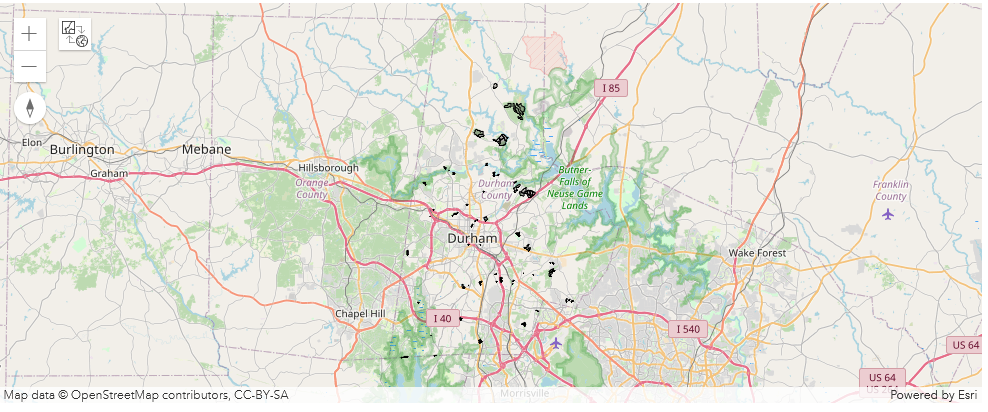

### Task 4e: Save the resulting featureset to a shapefile
* The FeatureSet has a function called `save()` which allows us to download our queried results. Save your results to `vacant_lots.shp` in the `data folder`.

In [58]:
#Try the save() function. It will fail if your aren't using an environment with ArcPy
fset.save(save_location='../data/',out_name='vacant_lots')

'..\\data\\vacant_lots.shp'

---
##### This won't work in the ArcGIS Python environment, but...
_If you don't have `arcpy` in your environmnent, the featuresets `save()` function will fail. A workaround is to save as a geopandas geodataframe. Converting from a featureset to a geopandas dataframe is done most easily by converting it to a GeoJSON object (using the featureset's `to_geojson` command), and then reading the GeoJSON object into a geodataframe using GeoPanda's `read_file()` function._


In [ ]:
#Convert the featureset to a geojson object
gjson = fset.to_geojson

In [ ]:
#Read that into a geodatframe
import geopandas as gpd
gdf = gpd.read_file(gjson)

In [ ]:
#And finally save that as a shapefile
gdf.to_file('../data/vacant_lots.shp')